In [ ]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [88]:
data = pd.read_csv('./bank.csv')
# exitedList = data['Exited']
# data['Stayed'] = [1 if exited == 0 else 0 for exited in exitedList]
data['Stayed'] = (data['Exited'] == 0).astype(int) # Vectorized implementation

In [89]:
print(data.head())

    Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619    France  Female  NaN       2       0.00   
1      Hill          608     Spain  Female   41       1   83807.86   
2      Onio          502    France  Female   42       8  159660.80   
3      Boni          699    France  Female   39       1       0.00   
4       NaN          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Satisfaction.Score Card.Type  Point.Earned  Stayed  
0                   2   DIAMOND           464       0  
1                   3   DIAMOND   

In [90]:
data = data.drop(labels=['Surname'], axis=1)
data = data.drop(labels=['Card.Type'], axis=1)
data = data.drop(labels=['Tenure'], axis=1)
data = data.drop(labels=['Balance'], axis=1)
data = data.drop(labels=['Exited'], axis=1)
data = data.drop(labels=['Point.Earned'], axis=1)
data = data.drop(labels=['Satisfaction.Score'], axis=1)

In [91]:
most_common = data['Geography'].mode()[0]
data['Geography'] = data['Geography'].replace('_', most_common)
geography_dummies = pd.get_dummies(data['Geography'], prefix='Geography').astype(int)
gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender').astype(int)

data = data.drop(['Geography', 'Gender'], axis=1)

data = pd.concat([data, geography_dummies, gender_dummies], axis=1)

In [92]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

_, p = shapiro(data['Age'])
if p < 0.05:
    print("age is normally distributed") 
else: 
    print("age is not normally distributed")

data.fillna({'Age': data['Age'].median()}, inplace=True)

age is not normally distributed


In [93]:
data.corr()

,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Stayed,Geography_-,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,0.000834,-0.012631,-0.005035,0.039484,0.003522,0.022986,-0.032014,-0.002122,-0.018046,0.022157,-0.013957,0.013957
Age,0.000834,1.000000,-0.039715,-0.002074,0.094829,-0.012751,-0.290177,0.004072,-0.028765,0.020159,0.012353,0.021973,-0.021973
NumOfProducts,-0.012631,-0.039715,1.000000,-0.016828,0.020986,0.016256,0.054238,-0.012845,-0.007440,-0.001539,0.011021,0.019443,-0.019443
HasCrCard,-0.005035,-0.002074,-0.016828,1.000000,-0.020798,-0.017377,0.004782,0.009176,0.014782,0.001447,-0.018154,-0.002784,0.002784
IsActiveMember,0.039484,0.094829,0.020986,-0.020798,1.000000,-0.006646,0.172493,-0.014549,0.020383,-0.032536,0.009108,-0.020004,0.020004
EstimatedSalary,0.003522,-0.012751,0.016256,-0.017377,-0.006646,1.000000,-0.005919,0.002468,-0.010102,0.029378,-0.017161,0.014672,-0.014672
Stayed,0.022986,-0.290177,0.054238,0.004782,0.172493,-0.005919,1.000000,-0.027812,0.090953,-0.153872,0.051145,-0.111838,0.111838
Geography_-,-0.032014,0.004072,-0.012845,0.009176,-0.014549,0.002468,-0.027812,1.000000,-0.014319,-0.008280,-0.008190,-0.013303,0.013303
Geography_France,-0.002122,-0.028765,-0.007440,0.014782,0.020383,-0.010102,0.090953,-0.014319,1.000000,-0.580578,-0.574278,-0.013363,0.013363
Geography_Germany,-0.018046,0.020159,-0.001539,0.001447,-0.032536,0.029378,-0.153872,-0.008280,-0.580578,1.000000,-0.332054,0.015555,-0.015555


In [94]:
print(data.isna().sum())

CreditScore          0
Age                  0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Stayed               0
Geography_-          0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64


In [95]:
print(data.dtypes)

CreditScore            int64
Age                  float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Stayed                 int32
Geography_-            int32
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
Gender_Female          int32
Gender_Male            int32
dtype: object


In [96]:
data_subset = data[data['Age'] <= 87]
print(data_subset.dtypes)

CreditScore            int64
Age                  float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Stayed                 int32
Geography_-            int32
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
Gender_Female          int32
Gender_Male            int32
dtype: object


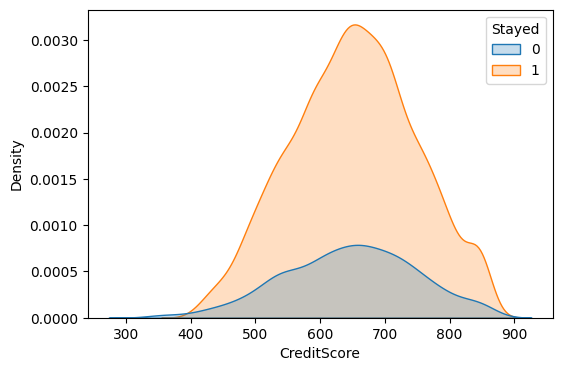

In [97]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data_subset, x='CreditScore', hue='Stayed', fill=True)
plt.show()

In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

x = data_subset.drop(['Stayed'], axis=1)
y = data_subset['Stayed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'ccp_alpha': np.arange(0.0, 0.05, 0.0025)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(x_train, y_train)

best_ccp_alpha = grid.best_params_['ccp_alpha']

In [99]:
print(best_ccp_alpha)

0.0025


Index(['CreditScore', 'Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_-', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


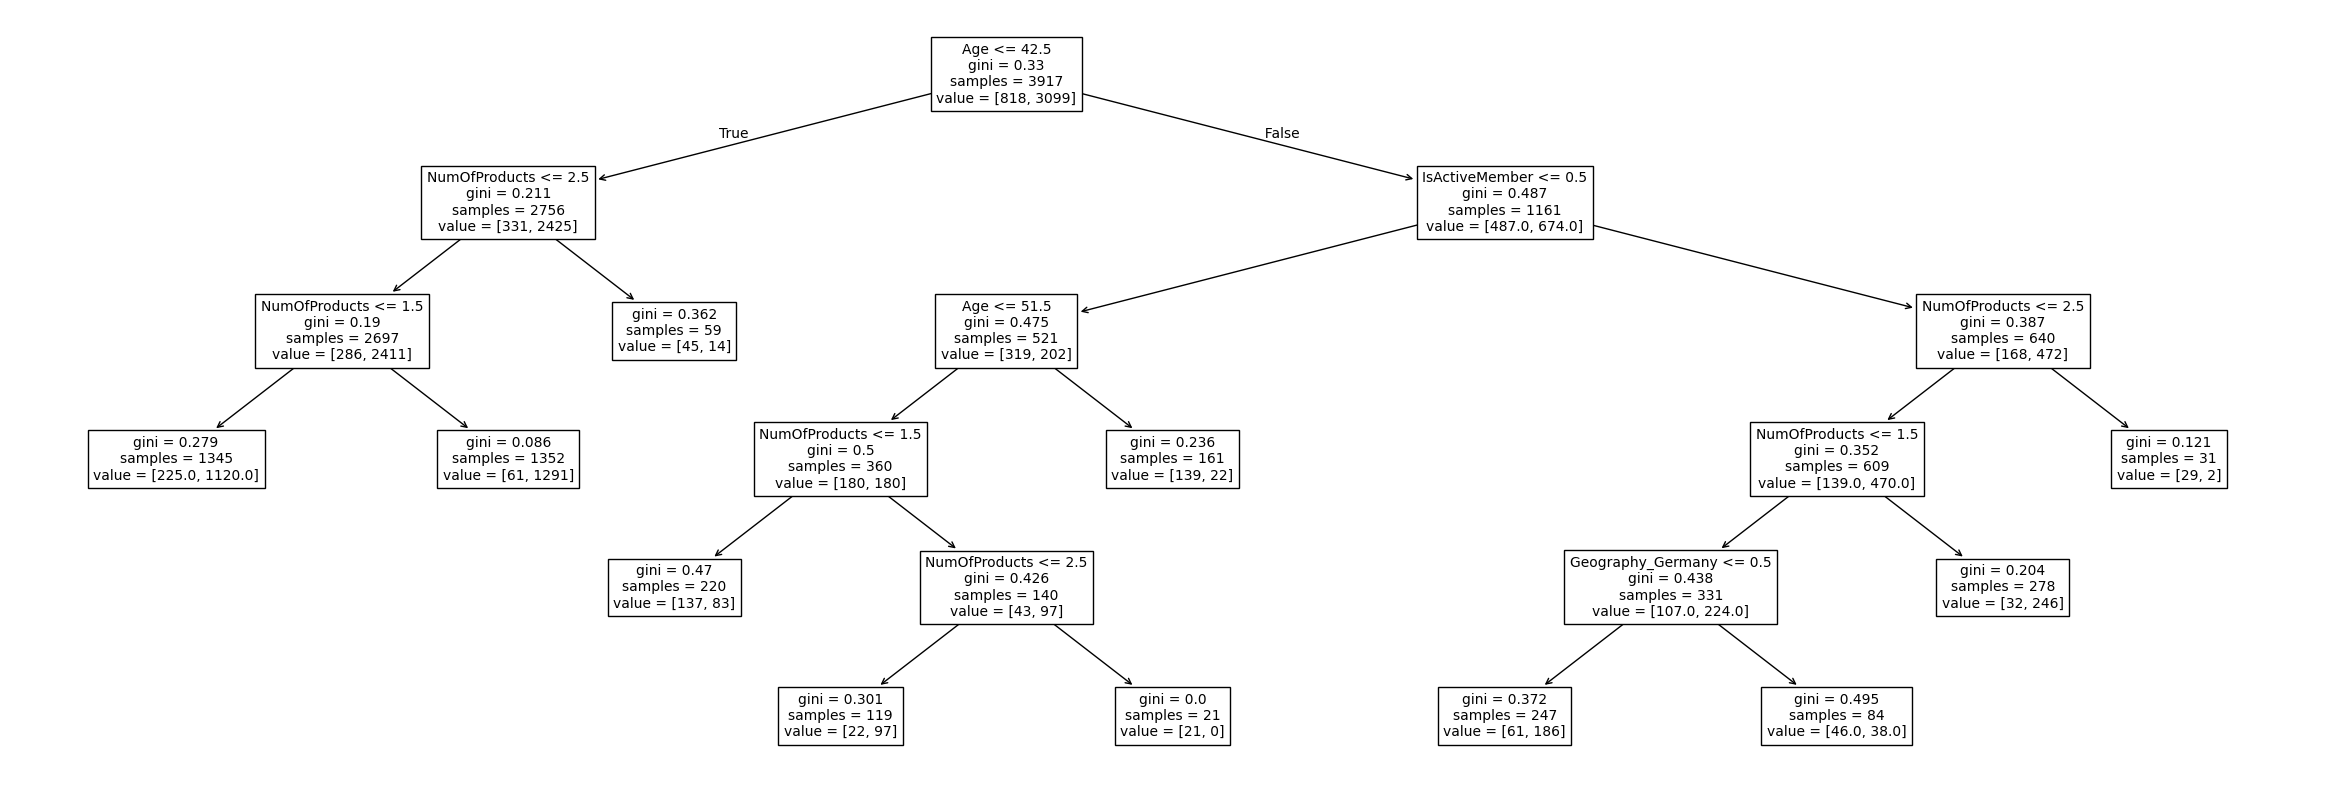

In [100]:
model = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=42)
model.fit(x_train, y_train)
print(x_train.columns)
plt.figure(figsize=[30,10])
plot_tree(model, feature_names=x_train.columns, fontsize=10) # class_names=['No', 'Yes']
plt.show()

In [101]:
y_pred = model.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104 101]
 [ 35 740]]


In [103]:
print(cm.sum())

980
